In [8]:
import argparse
from io import BytesIO
import base64
from dataset.hico import build
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
parser = argparse.ArgumentParser(description="hico")
parser.add_argument('--num_queries', default=100, type=int, help="Number of query slots")
parser.add_argument("--data_path", default="/data/dataset/HICO-DET/", type=str)
args = parser.parse_args([])

In [44]:
def count_anno(mode='train', max_hoi=165):
    dataset = build(mode, args)
    actions = dataset.get_actions()
    COCO_CLASSES = dataset.COCO_CLASSES
    print(mode, len(dataset))
    targets = ""
    left = list(range(max_hoi+1))
    height = [0]*(max_hoi+1)
    for i, (img, anno) in enumerate(tqdm(dataset, desc="Roading dataset")):
        target = f"{i+1}\t"
        
        hois = anno["hois"]
        # boxes = anno["boxes"]
        # labels = anno["labels"]
        #img_buffer = BytesIO()
        #img.save(img_buffer, format='png')#img.format)
        #byte_data = img_buffer.getvalue()
        #base64_str = base64.b64encode(byte_data) # bytes
        #base64_str = base64_str.decode("utf-8") # str
        #target += base64_str+'\t'

        count = 0
        for (hum_id, obj_id, hoi_id) in hois:
            # hum_bb = boxes[hum_id]
            # hum_label = labels[hum_id]
            # hum_name = COCO_CLASSES[hum_label]
            
            # obj_bb = boxes[obj_id]
            # obj_label = labels[obj_id]
            # obj_name = COCO_CLASSES[obj_label]
            
            # hoi_name = actions[hoi_id]
            
            # target += f"{hum_bb[0]},{hum_bb[1]},{hum_bb[2]},{hum_bb[3]},{hoi_id},{hoi_name},"
            # target += f"{obj_bb[0]},{obj_bb[1]},{obj_bb[2]},{obj_bb[3]},{obj_label},{obj_name}"
            
            # target += "&&"
            count += 1
                
        # target = target[:-2]
        # target += f'\n'
        
        # targets += target
        height[count] += 1
    fig = plt.figure(figsize=(20,2))
    plt.ylim(0, 20)
    plt.xlim(0, max_hoi)
    plt.bar(left, height, align="center", width=1.0)
    return left, height

val 9546


Roading dataset: 100%|██████████| 9546/9546 [00:17<00:00, 553.95it/s]


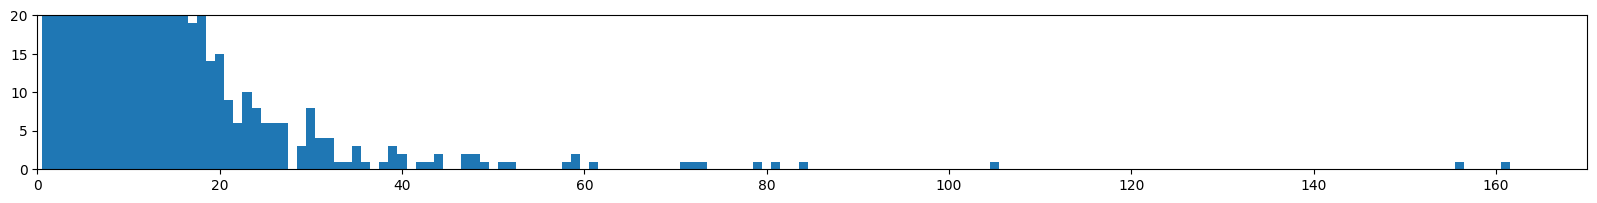

In [39]:
left, height = count_anno("val")

test 9546


Roading dataset: 100%|██████████| 9546/9546 [00:16<00:00, 582.44it/s]


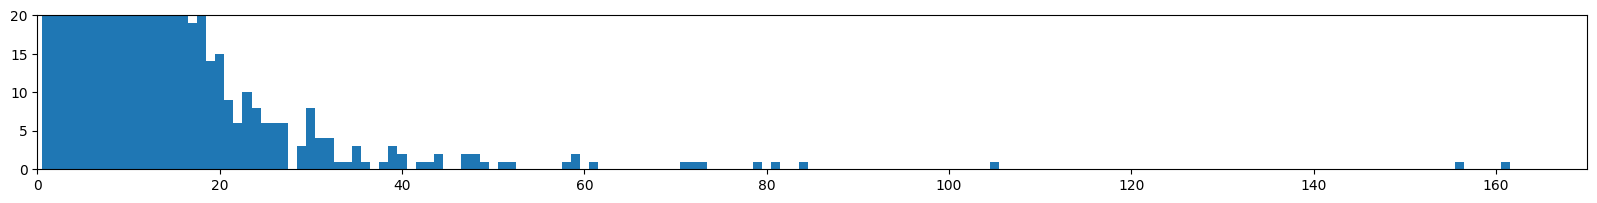

In [40]:
left, height = count_anno("test")

train 37633


Roading dataset: 100%|██████████| 37633/37633 [01:36<00:00, 390.26it/s]


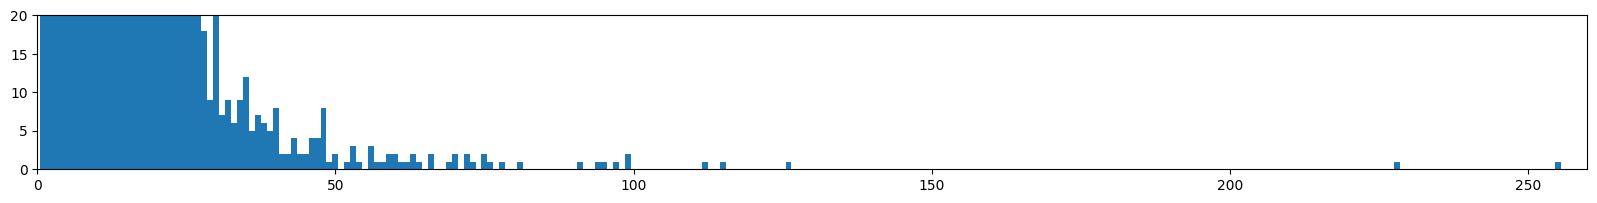

In [46]:
left, height = count_anno(max_hoi=260)